In [1]:
import numpy as np 

import pandas as pd

In [2]:
import matplotlib.pyplot as plt 

import keras  
from keras.models import Sequential 
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout 
from sklearn.metrics import accuracy_score 

In [3]:
train_dir = 'dogvscat/train' 
test_dir = 'dogvscat/test' 

In [4]:
from keras.preprocessing.image import ImageDataGenerator                                                                                      # keras image data generator getting input of original data makes transformation of data on random basis and goives resultant output
 
train_datagen = ImageDataGenerator(rescale=1./255) #image library path obvious changes
test_datagen = ImageDataGenerator(rescale=1./255) # image library which has actual results

# image augmentation method is applied which transforms the original images into copies of same images.

In [5]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode='binary')




Found 50 images belonging to 2 classes.


In [6]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode='binary')

# #  Training and validation data generator

Found 500 images belonging to 2 classes.


In [7]:
model = Sequential()


# model layers created and added


In [8]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



# 4 hidden layers of relu first input layer middle hidden layer and last sigmoid layers

# training of neural networks

In [9]:
model.summary() 

# it represents the relationship between model accuracy of training depend on epoch

# analyzing the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [10]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-3), metrics=['accuracy']) #parameters
# it configures the model for training Learning rate, metrics , optimizer,loss parameters

In [11]:
history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=10,validation_data=test_generator,validation_steps=test_generator.samples//20)
#main neural network is fitted or trained in0 10 epochs by suppling train data.

C:\Users\Shubham\AppData\Local\Temp\ipykernel_22140\372317494.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=10,validation_data=test_generator,validation_steps=test_generator.samples//20)


Epoch 1/10
25/25 [==============================] - 26s 1s/step - loss: 0.7951 - accuracy: 0.5080 - val_loss: 0.7000 - val_accuracy: 0.5250
Epoch 2/10
25/25 [==============================] - 29s 1s/step - loss: 0.6957 - accuracy: 0.5400 - val_loss: 0.6900 - val_accuracy: 0.6250
Epoch 3/10
25/25 [==============================] - 29s 1s/step - loss: 0.6967 - accuracy: 0.5200 - val_loss: 0.6897 - val_accuracy: 0.5500
Epoch 4/10
25/25 [==============================] - 30s 1s/step - loss: 0.6865 - accuracy: 0.5940 - val_loss: 0.7275 - val_accuracy: 0.5250
Epoch 5/10
25/25 [==============================] - 30s 1s/step - loss: 0.6903 - accuracy: 0.5860 - val_loss: 0.6604 - val_accuracy: 0.6500
Epoch 6/10
25/25 [==============================] - 29s 1s/step - loss: 0.6569 - accuracy: 0.6040 - val_loss: 0.6938 - val_accuracy: 0.5750
Epoch 7/10
25/25 [==============================] - 29s 1s/step - loss: 0.6574 - accuracy: 0.6220 - val_loss: 0.6672 - val_accuracy: 0.6500
Epoch 8/10
25/25 [==

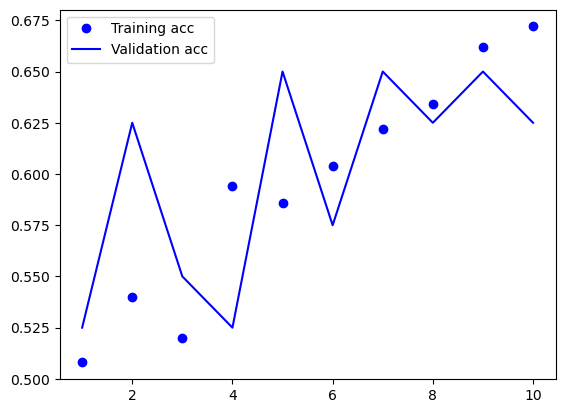

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()



plt.show()

# trainig data and validation data graph

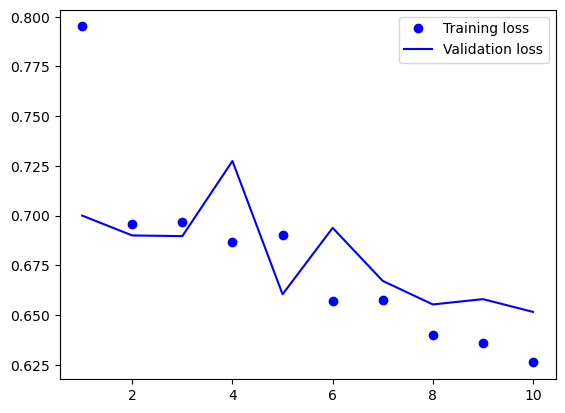

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

# graph comparison of loss vs val-loss

In [14]:
model.save('catvsdog.h5') #trained neural network model # save the model2

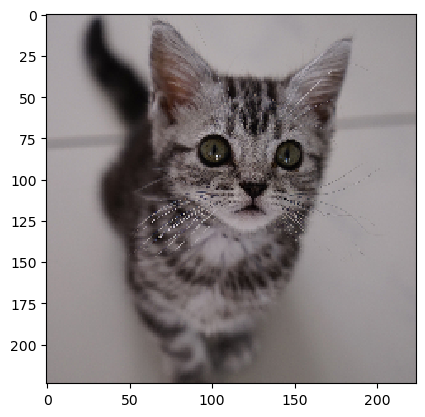

In [15]:
from tensorflow.keras.preprocessing import image
path ='dogvscat/train/0/119.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

# test the image randomly 

In [16]:
img_array = np.array(img)
img_array.shape
#image  converted to array 

(224, 224, 3)

In [17]:
img_array=img_array.reshape(1,224,224,3) # reshape the image (224*224) size of an array 

In [18]:
a = model.predict(img_array)
if a==[[0]]:
    
    print('dog')
else:
    print('cat')
    
    # prediction shown by if else condition

1/1 [==============================] - 0s 125ms/step
cat
